In [43]:
# Import required libraries
import numpy as np                 # For mathematical operations (like normalization)
import pandas as pd                # For handling CSV data (tables)
import matplotlib.pyplot as plt    # For plotting graphs
from tensorflow.keras.models import Sequential   # To build models layer-by-layer
from tensorflow.keras.layers import Dense        # To add fully connected layers (neurons)
from tensorflow.keras.optimizers import SGD      # Optimizer: Stochastic Gradient Descent

In [45]:
# 1. Load the dataset

data = pd.read_csv("C:/Users/senda/Desktop/Dataset.csv")

In [47]:
# 2. Select input and output

# X = "GrLivArea" (size of the house in square feet)
# y = "SalePrice" (price of the house)
X = data[['GrLivArea']].values   # Input feature (2D array, needed for Keras)
y = data['SalePrice'].values     # Output labels (1D array)

In [49]:
# 3. Normalize the data (scaling)

# Divide each value by the maximum value to bring it into range [0, 1]
# This helps training run faster and more stable
X = X / np.max(X)
y = y / np.max(y)

In [51]:
# 4. Build the model (Linear Regression in Keras)

# A linear regression model is just: y = W*x + b
# - Dense(1): one neuron (because we want 1 output: price)
# - input_shape=[1]: one input feature (house size)
# - No activation function (default is linear), so it’s just Wx + b
model = Sequential([
    Dense(1, input_shape=[1])
])

C:\Users\senda\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# 5. Compile the model

# optimizer = SGD: Stochastic Gradient Descent (used to update weights)
# loss = 'mse': Mean Squared Error (standard for regression problems)
# metrics = ['mae']: Mean Absolute Error (to measure average error size)
model.compile(optimizer=SGD(learning_rate=0.1),
              loss='mse',     
              metrics=['mae'])

In [55]:
# 6. Train the model

# Fit = train the model with input (X) and output (y)
# epochs=200 → pass through the dataset 200 times
# validation_split=0.2 → 20% of data used for validation (not trained on, only to check performance)
# verbose=1 → show training progress
history = model.fit(X, y, epochs=200, verbose=1, validation_split=0.2)


Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0094 - mae: 0.0714 - val_loss: 0.0130 - val_mae: 0.0773
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mae: 0.0640 - val_loss: 0.0127 - val_mae: 0.0758
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mae: 0.0626 - val_loss: 0.0120 - val_mae: 0.0747
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mae: 0.0615 - val_loss: 0.0119 - val_mae: 0.0731
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mae: 0.0605 - val_loss: 0.0116 - val_mae: 0.0720
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mae: 0.0596 - val_loss: 0.0113 - val_mae: 0.0710
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mae: 0.0587 - val_loss: 0.0108 - val_mae: 0.0697
Epoch 8/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mae: 0.0579 - val_loss: 0.0105 - val_mae: 0.0687
Epoch 9/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.00

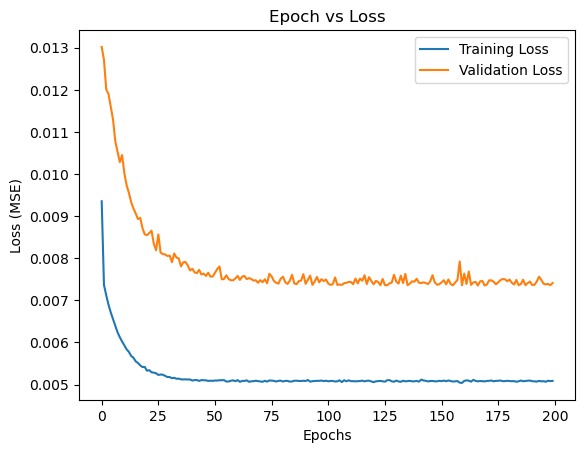

In [57]:
# 7. Plot Training vs Validation Loss

# history.history['loss'] = training loss (MSE)
# history.history['val_loss'] = validation loss (MSE)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')          # x-axis label
plt.ylabel('Loss (MSE)')      # y-axis label
plt.title('Epoch vs Loss')    # Title of the graph
plt.legend()
plt.show()

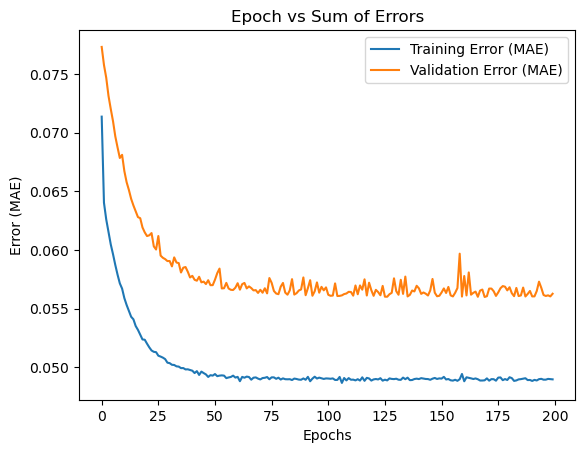

In [59]:
# 8. Plot Training vs Validation Error (MAE)

# history.history['mae'] = training error (Mean Absolute Error)
# history.history['val_mae'] = validation error (MAE on validation data)
plt.plot(history.history['mae'], label='Training Error (MAE)')
plt.plot(history.history['val_mae'], label='Validation Error (MAE)')
plt.xlabel('Epochs')          # x-axis label
plt.ylabel('Error (MAE)')     # y-axis label
plt.title('Epoch vs Sum of Errors')   # Title of the graph
plt.legend()
plt.show()